# LGM- VIRTUAL INTERNSHIP PROGRAM: DATA SCIENCE

## BATCH: JULY 2022

## TASK: 1 Iris Flowers Classification ML Project

## LEVEL: BEGINNER

## AUTHOR: ANKIT KALAMBHE

## IMPORT THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## LOADING DATASET

In [21]:
df = pd.read_csv("iris.csv",header=None)

## DATASET PREVIEW

In [22]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [23]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [25]:
df.dtypes

0    float64
1    float64
2    float64
3    float64
4     object
dtype: object

In [26]:
df.shape

(150, 5)

In [27]:
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
df.isnull()

,0,1,2,3,4
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [29]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

### TYPE OF SPECIES

In [36]:
species = df[4].unique().tolist()
species

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

### COUNTNG OF SPECIES

In [44]:
count = df[4].value_counts()
count_species = count.tolist()
count.to_frame()

,4
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


### Data visualization

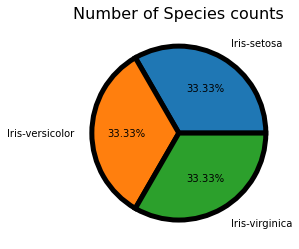

In [52]:
plt.pie(count, labels = unique_species, labeldistance = 1.2, wedgeprops = {'linewidth' : 5, 'edgecolor' : 'black'}, autopct = "%1.2f%%")
plt.title("Number of Species counts", fontsize = 16)
plt.show()

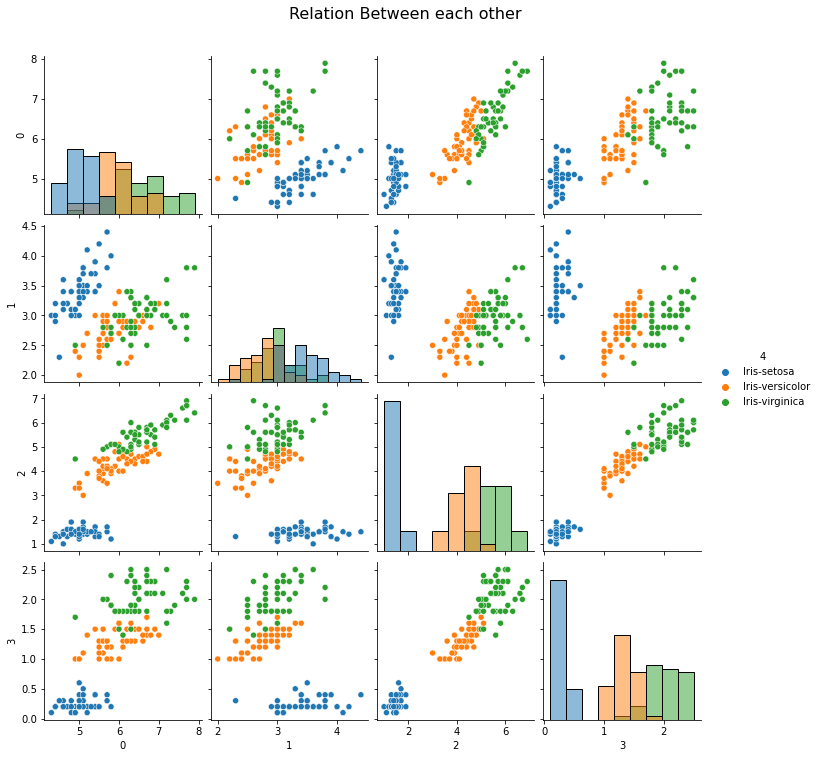

In [57]:
pplot = sns.pairplot(df, hue =  4, diag_kind = 'hist')
pplot.fig.suptitle("Relation Between each other", y = 1.05, fontsize = 16) 
plt.show()

In [58]:
from sklearn import preprocessing

In [64]:
X = df.iloc[:, 0:4]
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [65]:
Y = df[4]
Y = Y.values
Y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [66]:
std = preprocessing.StandardScaler()
X = std.fit_transform(X)
X[0:4]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673]])

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train, x_test, y_train, y_test =  train_test_split(X,Y, test_size = 0.3, random_state = 1)
print("x_train :" + str(x_train.shape))
print("x_test :" + str(x_test.shape))
print("y_train :" + str(y_train.shape))
print("y_test :" + str(y_test.shape))

x_train :(105, 4)
x_test :(45, 4)
y_train :(105,)
y_test :(45,)


In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

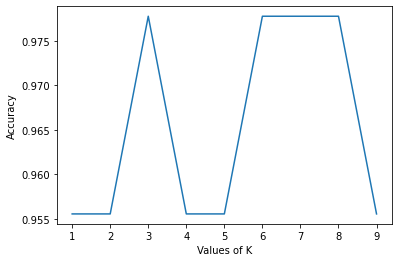

From above line plot, the model giving maximum accuracy for the K = 3


In [70]:
best_k = 0
best_acc = 0.0
acc_arr = np.zeros((9,))

for k in range(1,10):
    # model creation and prediction on X2
    
    knn_temp = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
    y2_result = knn_temp.predict(x_test)
    
    # calculating accuracy of model
    
    acc_score = accuracy_score(y_test, y2_result)
    acc_arr[k-1] = acc_score
    
    if acc_score > best_acc:
        best_k = k
        knn = knn_temp
        best_acc = acc_score
        
plt.plot(range(1,10),acc_arr)
plt.xlabel("Values of K")
plt.ylabel("Accuracy")
plt.show()

print("From above line plot, the model giving maximum accuracy for the K =",best_k)

In [71]:
knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(x_train, y_train)
y_pred =  knn.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [72]:
acc =  accuracy_score(y_pred, y_test)
print("Accuracy of the created KNN model is " + str(acc*100) +"%")

Accuracy of the created KNN model is 97.77777777777777%


### -----END-----